In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics


In [3]:
df=pd.read_csv('/home/rgukt/Downloads/oasis_infobyte/car data.csv')
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [5]:
df.head(15)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
null_columns = [col for col in df.columns if df[col].isnull().any()]
print("Columns with null values:", null_columns)

Columns with null values: []


In [9]:
df.isnull().any

<bound method DataFrame.any of      Car_Name   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Selling_type  Transmission  Owner  
0  

In [10]:
df.shape

(301, 9)

In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Checking the number of missing values in data set


In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


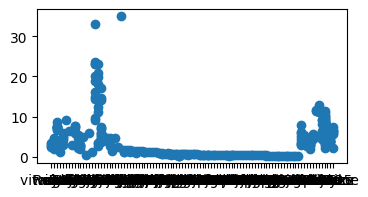

In [84]:
import matplotlib.pyplot as plt
# prediction on Training data

plt.figure(figsize=(4,2))
plt.scatter(df['Car_Name'], df['Selling_Price'])

plt.show()

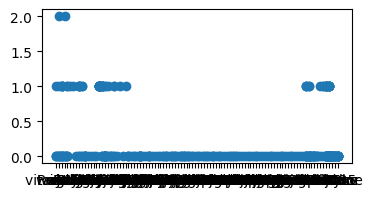

In [85]:
# prediction on Training data

plt.figure(figsize=(4,2))
plt.scatter(df['Car_Name'], df['Fuel_Type'])

plt.show()

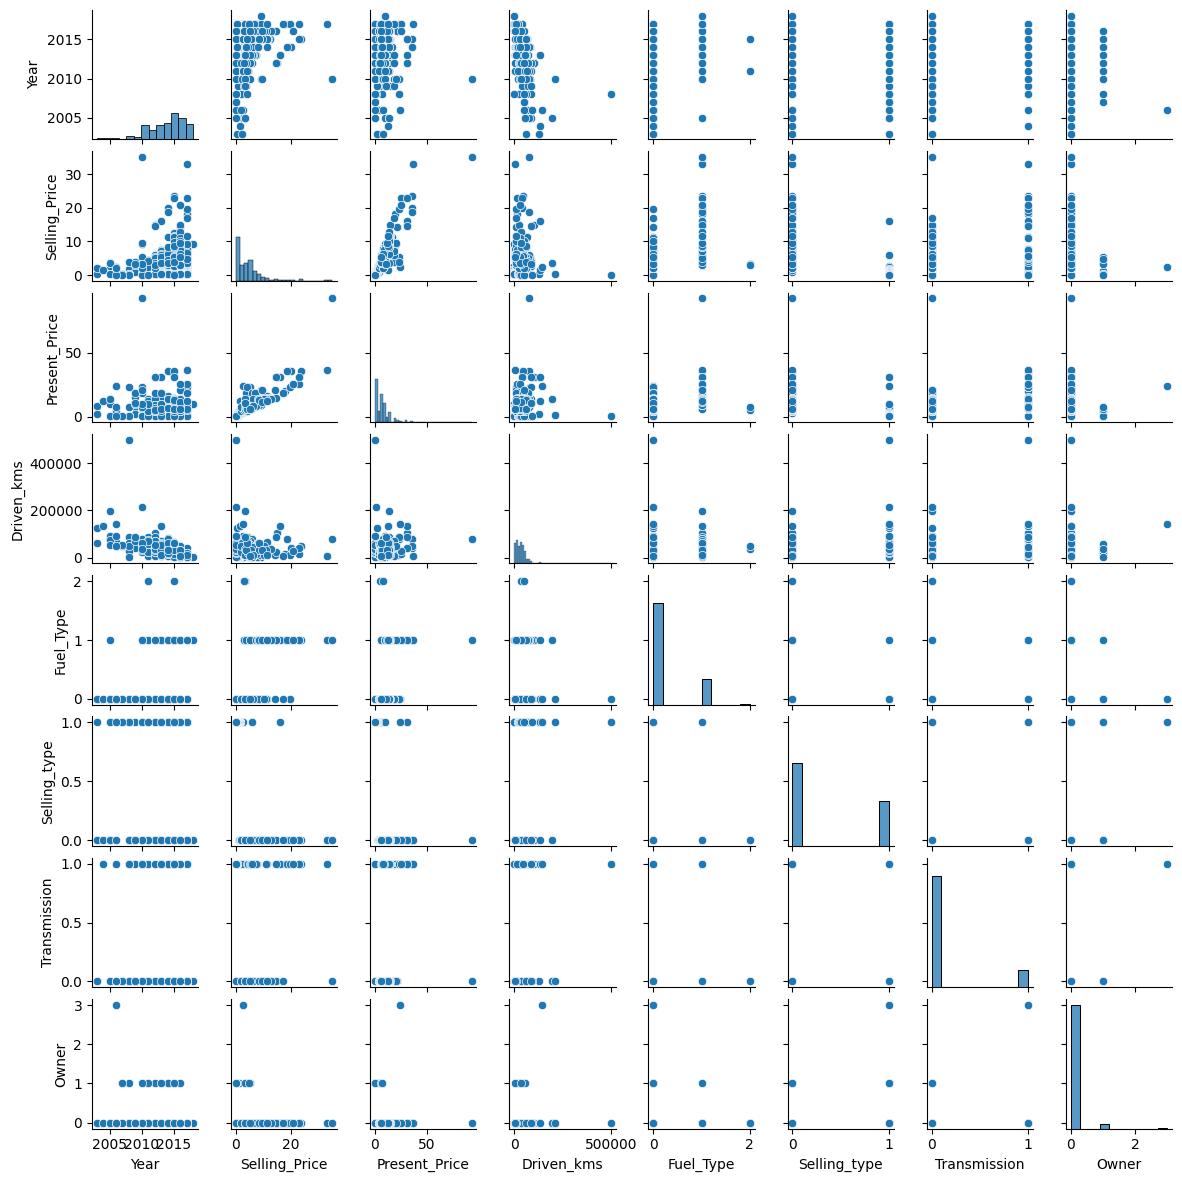

In [52]:
sns.pairplot(df,height=1.5)


Checking the ditribution of categorical data


In [18]:
print(df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [21]:
print(df.Selling_type.value_counts())

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [22]:
print(df.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [39]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\kavya\AppData\Local\Temp\ipykernel_13376\1351057131.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [40]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


Splitting data inot Testing Data and Trainig Data

In [41]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [42]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [58]:
lass_reg_model=Lasso()

In [60]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [61]:
# R squared Error
training_data_prediction = lass_reg_model.predict(x_train)

In [74]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8796483009370217


In [76]:
test_data_prediction = lass_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8708765225430606


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

Model Trainig 

Linear Regression

In [67]:
lin_reg_model=LinearRegression()

In [68]:
# lin_reg_model.fit(x_train,y_train)
try:
    lin_reg_model.fit(x_train, y_train)
    print("Model successfully fitted.")
except ValueError as e:
    print(f"Error fitting model: {e}")

Model successfully fitted.


In [69]:
test_data_prediction=lin_reg_model.predict(x_train)

In [71]:
training_data_prediction = lin_reg_model.predict(x_train)

In [73]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8796483009370217


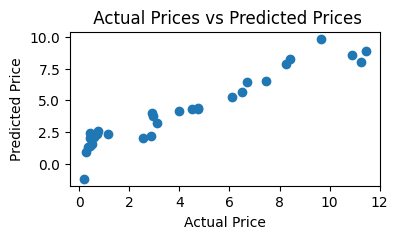

In [81]:
plt.figure(figsize=(4,2))
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

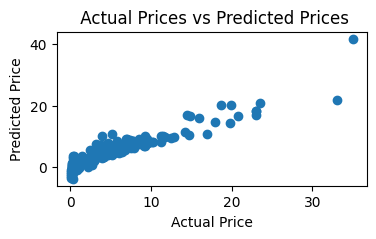

In [82]:
training_data_prediction = lin_reg_model.predict(x_train)
plt.figure(figsize=(4,2))
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()